## Exact Bionmial Test

Answers to exercises found here: 

https://canvas.upenn.edu/courses/1358934/discussion_topics/5012730

Copyright 2019 by Joshua I. Gold, University of Pennsylvania
    
    Created 09/29/18
    
    Ported to Python 04/23/21

In [ ]:
import platform

# Output on system used for development/testing:
# 3.9.2
print(platform.python_version())

# Uncomment and run to clear workspace
# %reset

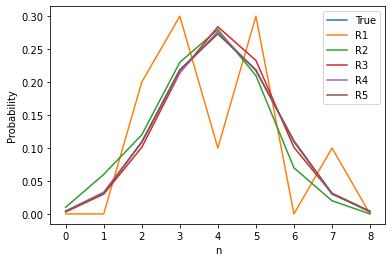

In [45]:
import scipy.stats as st
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

# Exercise 2: 
#  5. 
X = np.arange(0,9)    # all possible values of k
n = 8                 # total trials
p = 0.5         # the Null hypothesis
# create a dataframe with the true pmf as the first row
df = pd.DataFrame(st.binom.pmf(X,n,p), index=X, columns=['True'], dtype=float)

# Simulate using increasing numbers of samples
for sz in np.arange(1,6):
    col = f'R{int(sz)}'
    df[col] = pd.Series(collections.Counter(st.binom.rvs(n, p, size=int(10**sz))))
    df[col] = df[col].fillna(0)/df[col].sum()

df.plot()
plt.xlabel('n')
plt.ylabel('Probability')
plt.show()


In [54]:
# Exercise 3. p = 0.0313
print(f'Exercise 3, p = {st.binom.pmf([0, 6], 6, 0.5).sum():.4f}')

# Exercise 4. p = 1 - (no extreme in first comparison) * (no extreme in second comparison)
#      = 0.0388
p1 = st.binom.pmf([0, 8], 8, 0.5).sum()
p2 = st.binom.pmf([0, 6], 6, 0.5).sum()
print(f'Exercise 4, p = {1 - (1-p1)*(1-p2):.4f}')

# Exercise 5. p = 1 - prod(no extreme in each comparison)
#      = 0.0832
print(f'Exercise 5, p = {1 - np.product(1-st.binom.pmf(0, [8, 6, 7, 7, 7], 0.5)*2):.4f}')

# Exercise 6. p = 0.2820
print(f'Exercise 6, p = {1 - np.product(1-st.binom.pmf(0, [14, 14, 12, 14, 13, 11, 10, 8, 6, 3], 0.5)*2):.4f}')


Exercise 3, p = 0.0313
Exercise 4, p = 0.0388
Exercise 5, p = 0.0832
Exercise 6, p = 0.2820
